# calculate the ROC of classify pred ouptut and show the result

In [5]:
## prepare the module
# 准备功能模块

import os
import sys
import numpy as nplb2int

def lb2int(lbs,std_lbs):
    '''
    get the label of sample change into int for calculate
    '''
    result=[]
    for lb in lbs:
        if not lb in std_lbs:
            result.append(std_lbs.index('其他'))
        else:
            result.append(std_lbs.index(lb))

    return result

def pickle_label_from_txt(fname,std_lbs,sep='\t'):
    '''
    get the pred
    '''
    result = []
    with open(fname,'r') as f:
        lines = f.readlines()
        for line in lines:
            result.append(line.split('\t')[0])
        return lb2int(result,std_lbs)

def txt2pred(fname):
    '''
    get the pred
    '''
    result = []
    with open(fname,'r') as f:
        lines = f.readlines()
        for line in lines:
            result.append([float(_) for _ in line.split('\t')])
        return [line.index(max(line)) for line in result]

def txt2arr(fname):
    '''
    get the pred of sample change into 2d-arr for calculate
    '''
    result = []
    with open(fname,'r') as f:
        lines = f.readlines()
        for line in lines:
            result.append([float(_) for _ in line.split('\t')])
        return np.array(result)
    
def subsqr_int_2_lb(lbs,arr_2d):
    result=[]
    for line in arr_2d:
        mean_value = np.mean(line)
        result.append(lbs[line.index(max(line))])
    return result

def data_pre_handler(arr_2d,lbs,test_file):
    df = pd.read_csv(test_file,sep='\t')
    return df

def type_check(cont, _type):
    """
    check the type of var is correct or not
    """
    try:
        assert type(cont) == _type
    except:
        prt = str(locals())
        raise Exception("Invalid Type, %s"%prt)


In [7]:
# 准备数据

import numpy as np
fname = './data/test_results.tsv'
fsample = './data/test.tsv'
std_lbs = [i.strip() for i in open('./data/lbs.tsv','r').readlines()]
std_lbs.remove('')
std_lbs.remove('其他')
std_lbs[:0]=['其他']
std_lbs = std_lbs[:34]

print(std_lbs)
pred = txt2pred(fname)
score = txt2arr(fname)
y_test = pickle_label_from_txt(fsample,std_lbs,'\t')
print(len(pred))
print(score.shape)
print(len(y_test))
print(len(std_lbs))


['其他', 'IT', '体育', '入室盗窃', '入户抢劫', '其他双抢', '其他涉毒', '其他盗窃', '其他诈骗', '军事', '卖淫嫖娼', '国内', '国际', '奥运', '女性', '娱乐', '徒步抢夺', '房产', '扒窃', '抢劫汽车', '拦路抢劫', '教育', '文化', '求助', '汽车', '电话诈骗', '盗窃三电设施', '盗窃单位', '盗窃商店', '盗窃建筑工地', '盗窃手机', '盗窃摩托车', '盗窃汽车', '盗窃牲畜']
29974
(29974, 34)
29974
34


# 使用In[19] 并准备数据，可以评估分类样本，并生成ROC评估图谱


其中y_test为测试集的结果，scores为模型预测的测试集得分
注意：通过decision_function(x_test)计算scores的值

fpr,tpr,thresholds 分别为假正率、真正率和阈值。
应该是不同阈值下的真正率和假正率

poc只能评估2分类，故此处使用过滤，针对某一个分类进行评估



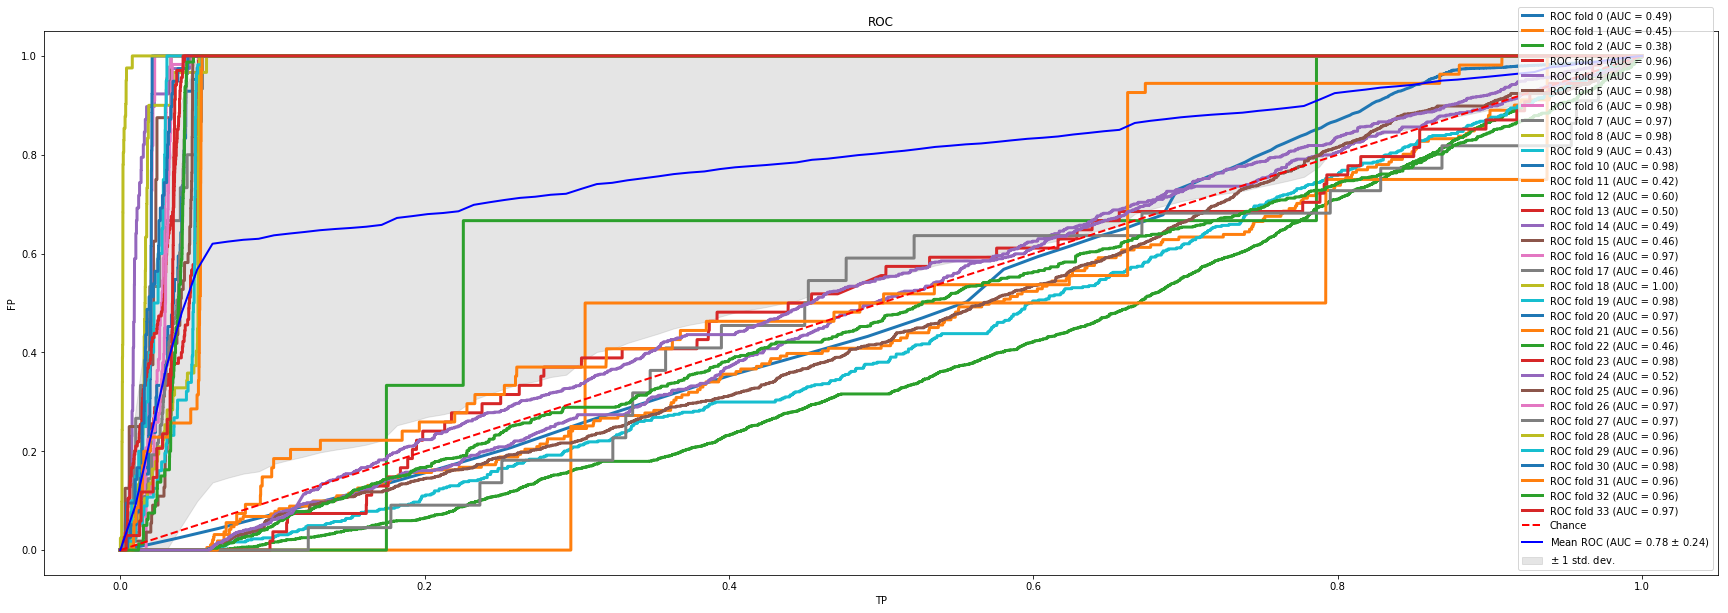

In [25]:
'''
做图显示不同类别的AUC ROC

输入:
    y_test: 将样本标签转为int,形如[1,0,3,5,7,2,1,4...0]
    score: 预测输出的概率矩阵,形如[样本数,分类类别数]
输出：show
'''


import sklearn.metrics

'''
其中y_test为测试集的结果，scores为模型预测的测试集得分
注意：通过decision_function(x_test)计算scores的值

fpr,tpr,thresholds 分别为假正率、真正率和阈值。
应该是不同阈值下的真正率和假正率

poc只能评估2分类，故此处使用过滤，针对某一个分类进行评估
'''
print(__doc__)

import numpy as np
from scipy import interp
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold

# #############################################################################
# Classification and ROC analysis

# Run classifier with cross-validation and plot ROC curves
plt.figure(figsize=(20,10))

i = 0
mean_fpr = np.linspace(0, 1, 100)
tprs = []
aucs = []

for proba in np.array(score).T:
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y_true=y_test,pos_label=i,y_score=proba)
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=3, alpha=1.,label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

    i += 1
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=1.)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=1.)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel(u'TP')
plt.ylabel(u'FP')
plt.title(u'ROC')
plt.legend(loc="lower right")
plt.show()

参数解释:
1. 真阳性 正确预测的该分类
2. 假阳性 错误预测的该分类
3. AUC 判据，所有该类样本的判据阈值求mean 如 AUC=0.78，
4. ROC，在模型预测的阳性该类样本中,AUC范围变化可能导致的预测结果变化(AUC_min <> AUC_max)
5. chage，基准线（0，0）（1，1）
6. 完美情况, 所有的类别里预测结果均为陡峭矩形
7. 应用，使用恰当的AUC做判据